# Task 1: Encoding Analysis

## Letter Frequency Comparison Code Explanation

Below code compares the frequency of each letter in the English alphabet between the standard and the chosen text dataset. It uses the `pandas` library to structure the data and `matplotlib` to visualize the comparison. The `string` module is imported to access `string.ascii_lowercase`, which provides a complete, ordered list of all lowercase English letters. This ensures that the DataFrame includes every letter from 'a' to 'z', even those with zero frequency, allowing for a consistent and comprehensive comparison.
Two dictionaries are defined: one for standard English letter frequencies and another for the dataset-specific frequencies. A DataFrame is constructed to align each letter with its respective frequencies, and two line graphs are plotted to highlight differences. The resulting chart reveals which letters are over- or underrepresented in the dataset, offering insights into its linguistic characteristics and potential implications for entropy and compression analysis.

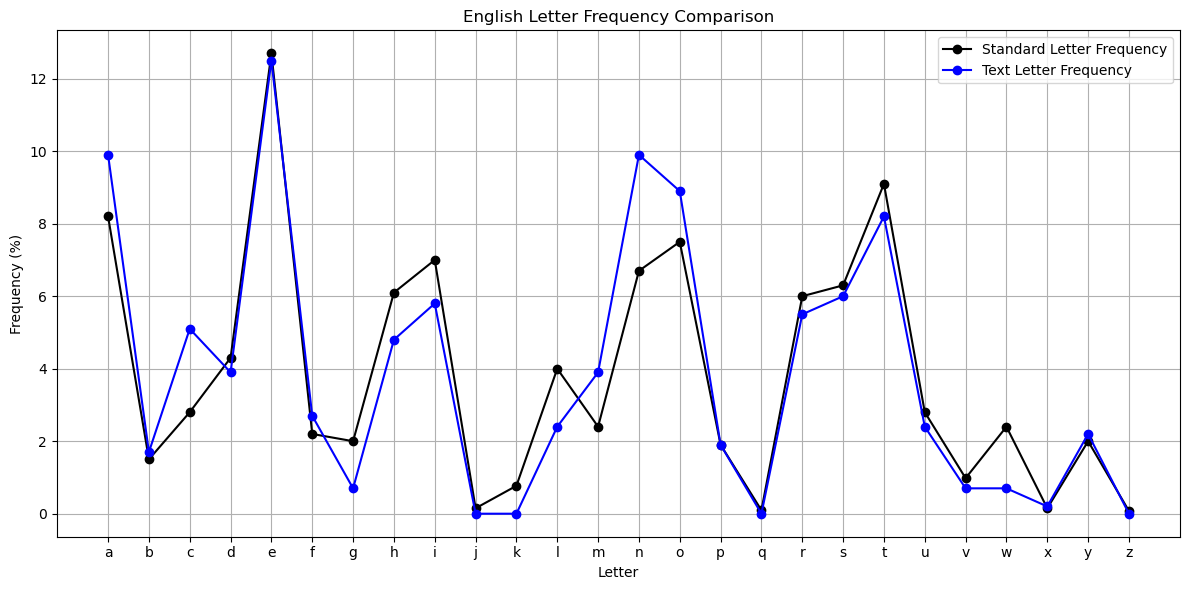

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import string 

# Standard English letter frequencies (from Wikipedia)
standard_freq = {
    'a': 8.2, 'b': 1.5, 'c': 2.8, 'd': 4.3, 'e': 12.7, 'f': 2.2, 'g': 2.0, 'h': 6.1,
    'i': 7.0, 'j': 0.15, 'k': 0.77, 'l': 4.0, 'm': 2.4, 'n': 6.7, 'o': 7.5, 'p': 1.9,
    'q': 0.095, 'r': 6.0, 's': 6.3, 't': 9.1, 'u': 2.8, 'v': 0.98, 'w': 2.4, 'x': 0.15,
    'y': 2.0, 'z': 0.074
}

# Text dataset frequencies 
txt_freq = {
    'a': 9.9, 'b': 1.7, 'c': 5.1, 'd': 3.9, 'e': 12.5, 'f': 2.7, 'g': 0.7, 'h': 4.8,
    'i': 5.8, 'j': 0.0, 'k': 0.0, 'l': 2.4, 'm': 3.9, 'n': 9.9, 'o': 8.9, 'p': 1.9,
    'q': 0.0, 'r': 5.5, 's': 6.0, 't': 8.2, 'u': 2.4, 'v': 0.7, 'w': 0.7, 'x': 0.2,
    'y': 2.2, 'z': 0.0
}

# Create DataFrames
letters = list(string.ascii_lowercase)
df = pd.DataFrame({
    'Letter': letters,
    'Standard Frequency': [standard_freq.get(letter, 0) for letter in letters],
    'Text Dataset Frequency': [txt_freq.get(letter, 0) for letter in letters]
})

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(df['Letter'], df['Standard Frequency'], label='Standard Letter Frequency', marker='o', color='black')
plt.plot(df['Letter'], df['Text Dataset Frequency'], label='Text Letter Frequency', marker='o', color='blue')
plt.title('English Letter Frequency Comparison')
plt.xlabel('Letter')
plt.ylabel('Frequency (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 2: Huffman Coding

## Huffman Tree Generation Code Explanation

Below dictionary represents the frequency count of each character in a given English text dataset.

In [8]:
# Frequency dictionary
freq_dict = {
    'e': 52, 'n': 41, 'a': 40, 'o': 37, 't': 31, 'i': 24, 'r': 23, 's': 21, 'h': 20,
    'c': 19, 'd': 16, 'm': 15, 'f': 11, 'l': 10, 'u': 10, 'y': 9, 'p': 8, 'b': 7,
    'g': 3, 'v': 3, 'w': 3, 'x': 1,
    'S': 4, 'T': 3, 'C': 2, 'A': 1, 'M': 1,
    '1': 1, '4': 1, '8': 1, '9': 1,
    ' ': 83, '"': 4, ',': 4, '.': 3, '–': 2, '’': 1, ':': 1
}


Below code constructs a Huffman tree based on the frequency of characters in a given dataset and visualizes the resulting binary structure. It uses the `heapq` module to efficiently build the tree using a priority queue, ensuring that characters with lower frequencies are merged earlier. Each character and its frequency are encapsulated in a custom `HuffmanNode` class, which supports comparison for heap operations.

The tree is built by repeatedly combining the two least frequent nodes into a new parent node, whose frequency is the sum of its children. This process continues until a single root node remains, representing the full Huffman tree.

To visualize the tree, the `networkx` and `matplotlib` libraries are used. A recursive function traverses the tree and constructs a directed graph, positioning nodes based on depth and horizontal spacing. Each node is labeled with either its character or cumulative frequency, and edges represent binary decisions (left = 0, right = 1).

The final visualization provides a clear structural overview of how characters are encoded, with frequent characters appearing closer to the root and receiving shorter binary codes. This graphical representation complements the entropy analysis by illustrating how Huffman coding achieves near-optimal compression through variable-length encoding.

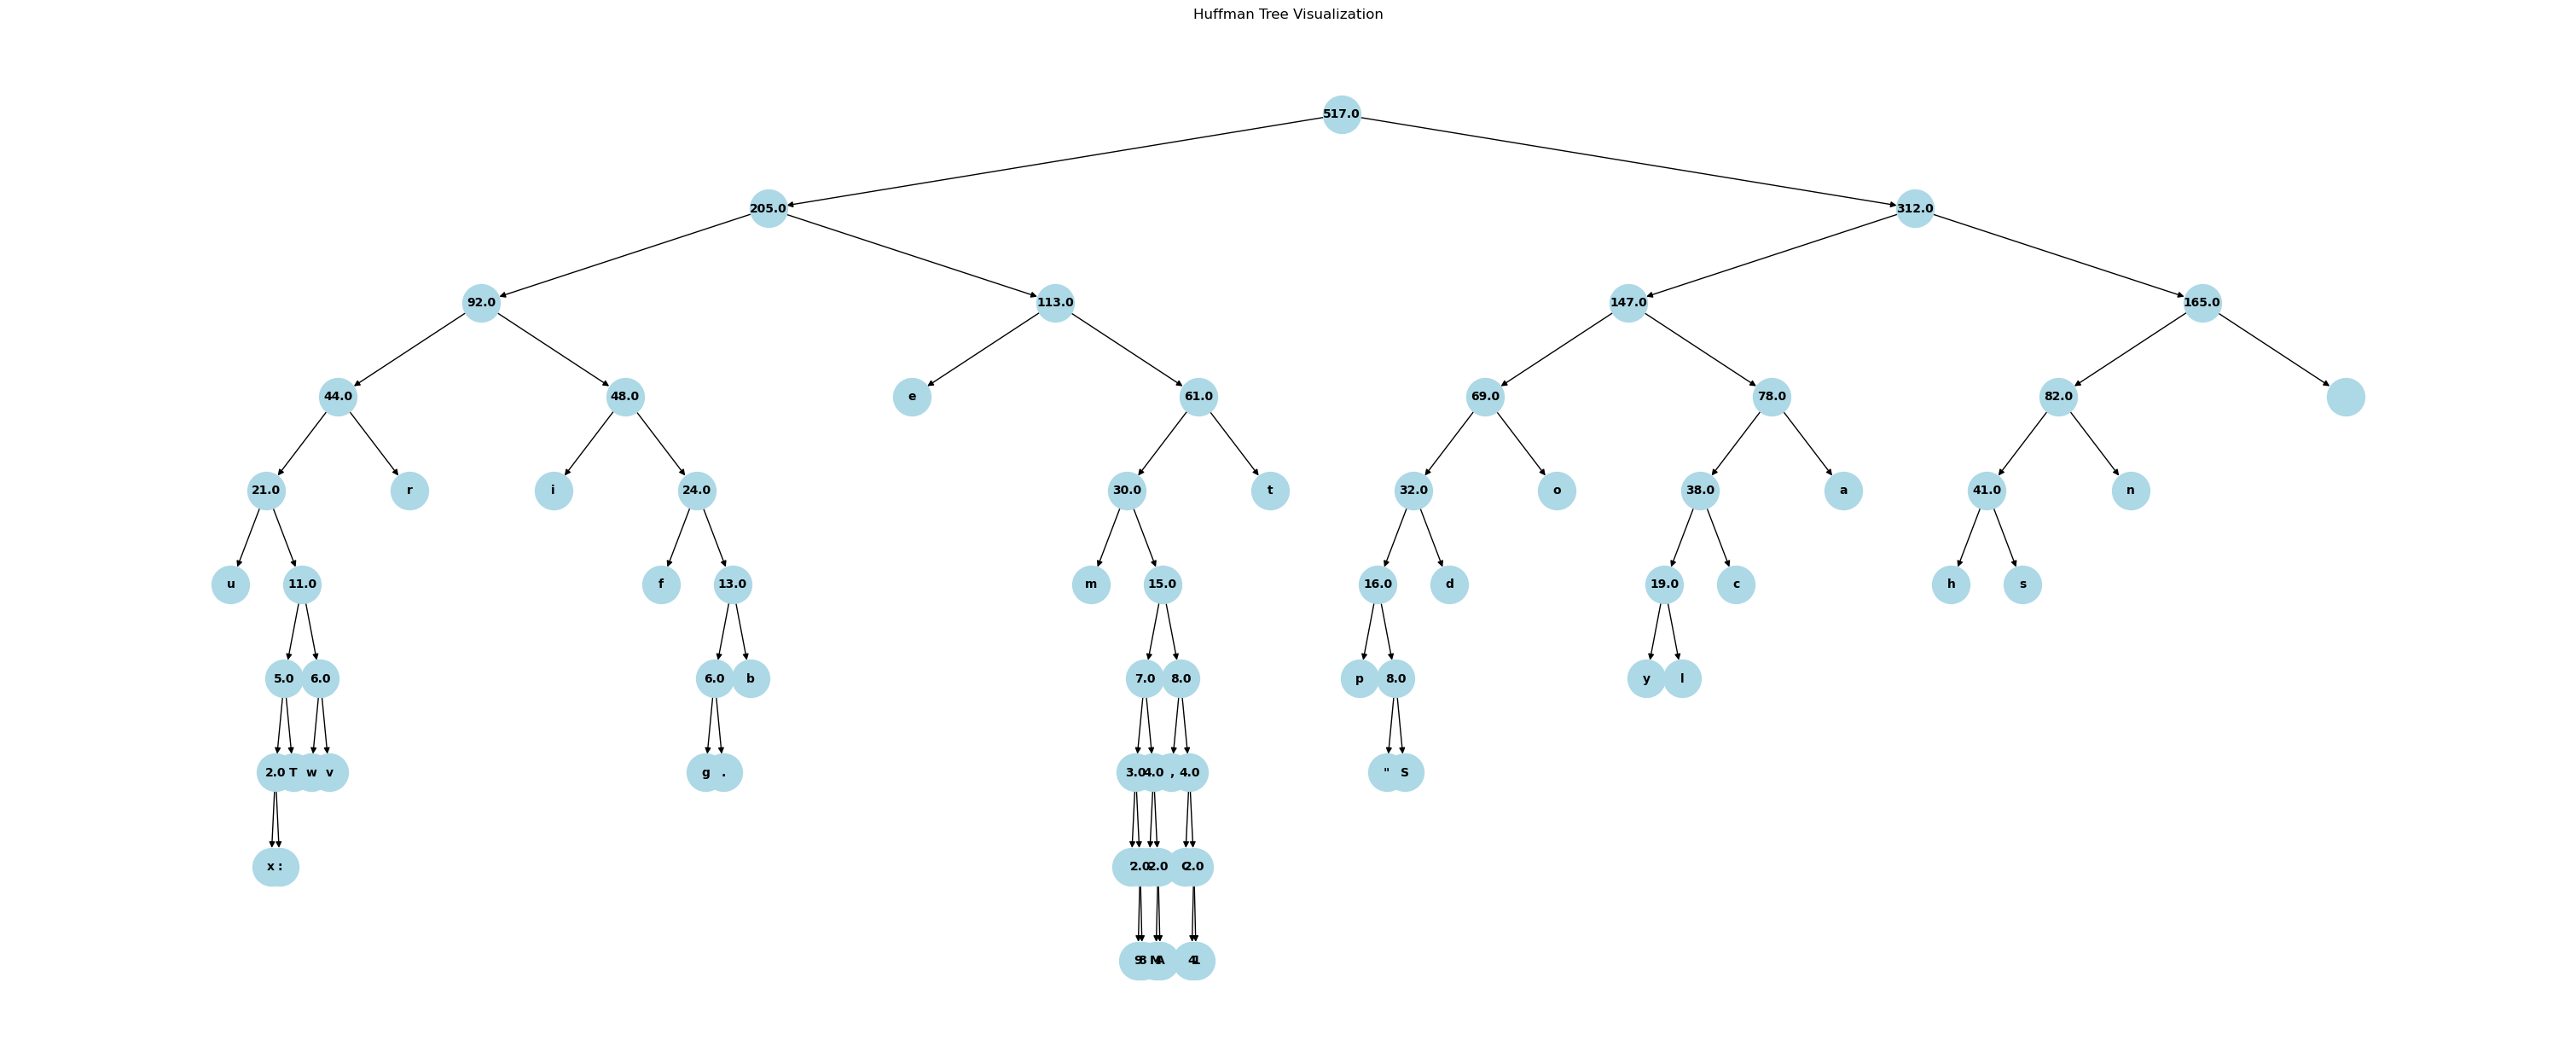

In [10]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# Huffman Tree Node
class HuffmanNode:
    def __init__(self, char=None, freq=0):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

# Build Huffman Tree
def build_huffman_tree(freq_dict):
    heap = [HuffmanNode(char, freq) for char, freq in freq_dict.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = HuffmanNode(freq=left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)

    return heap[0]

# Visualize Huffman Tree
def visualize_huffman_tree(root):
    G = nx.DiGraph()
    pos = {}
    labels = {}

    def add_edges(node, parent=None, x=0, y=0, dx=1.0):
        if node is None:
            return
        node_id = id(node)
        label = node.char if node.char else f"{node.freq:.1f}"
        labels[node_id] = label
        pos[node_id] = (x, y)
        if parent is not None:
            G.add_edge(id(parent), node_id)
        add_edges(node.left, node, x - dx, y - 1, dx / 2)
        add_edges(node.right, node, x + dx, y - 1, dx / 2)

    add_edges(root)

    plt.figure(figsize=(30, 12))
    nx.draw(G, pos, labels=labels, with_labels=True,
            node_size=1000, node_color='lightblue',
            font_size=10, font_weight='bold')
    plt.title("Huffman Tree Visualization")
    plt.axis('off')
    plt.show()

# Run the workflow
huffman_root = build_huffman_tree(freq_dict)
visualize_huffman_tree(huffman_root)


Below code provides a focused visualization of the left and right subtrees of a Huffman tree, enabling detailed structural analysis of character encoding paths. The function `visualize_subtree()` uses the `networkx` and `matplotlib` libraries to render a directed graph representation of a given subtree, with enhanced spacing and labeling for clarity.

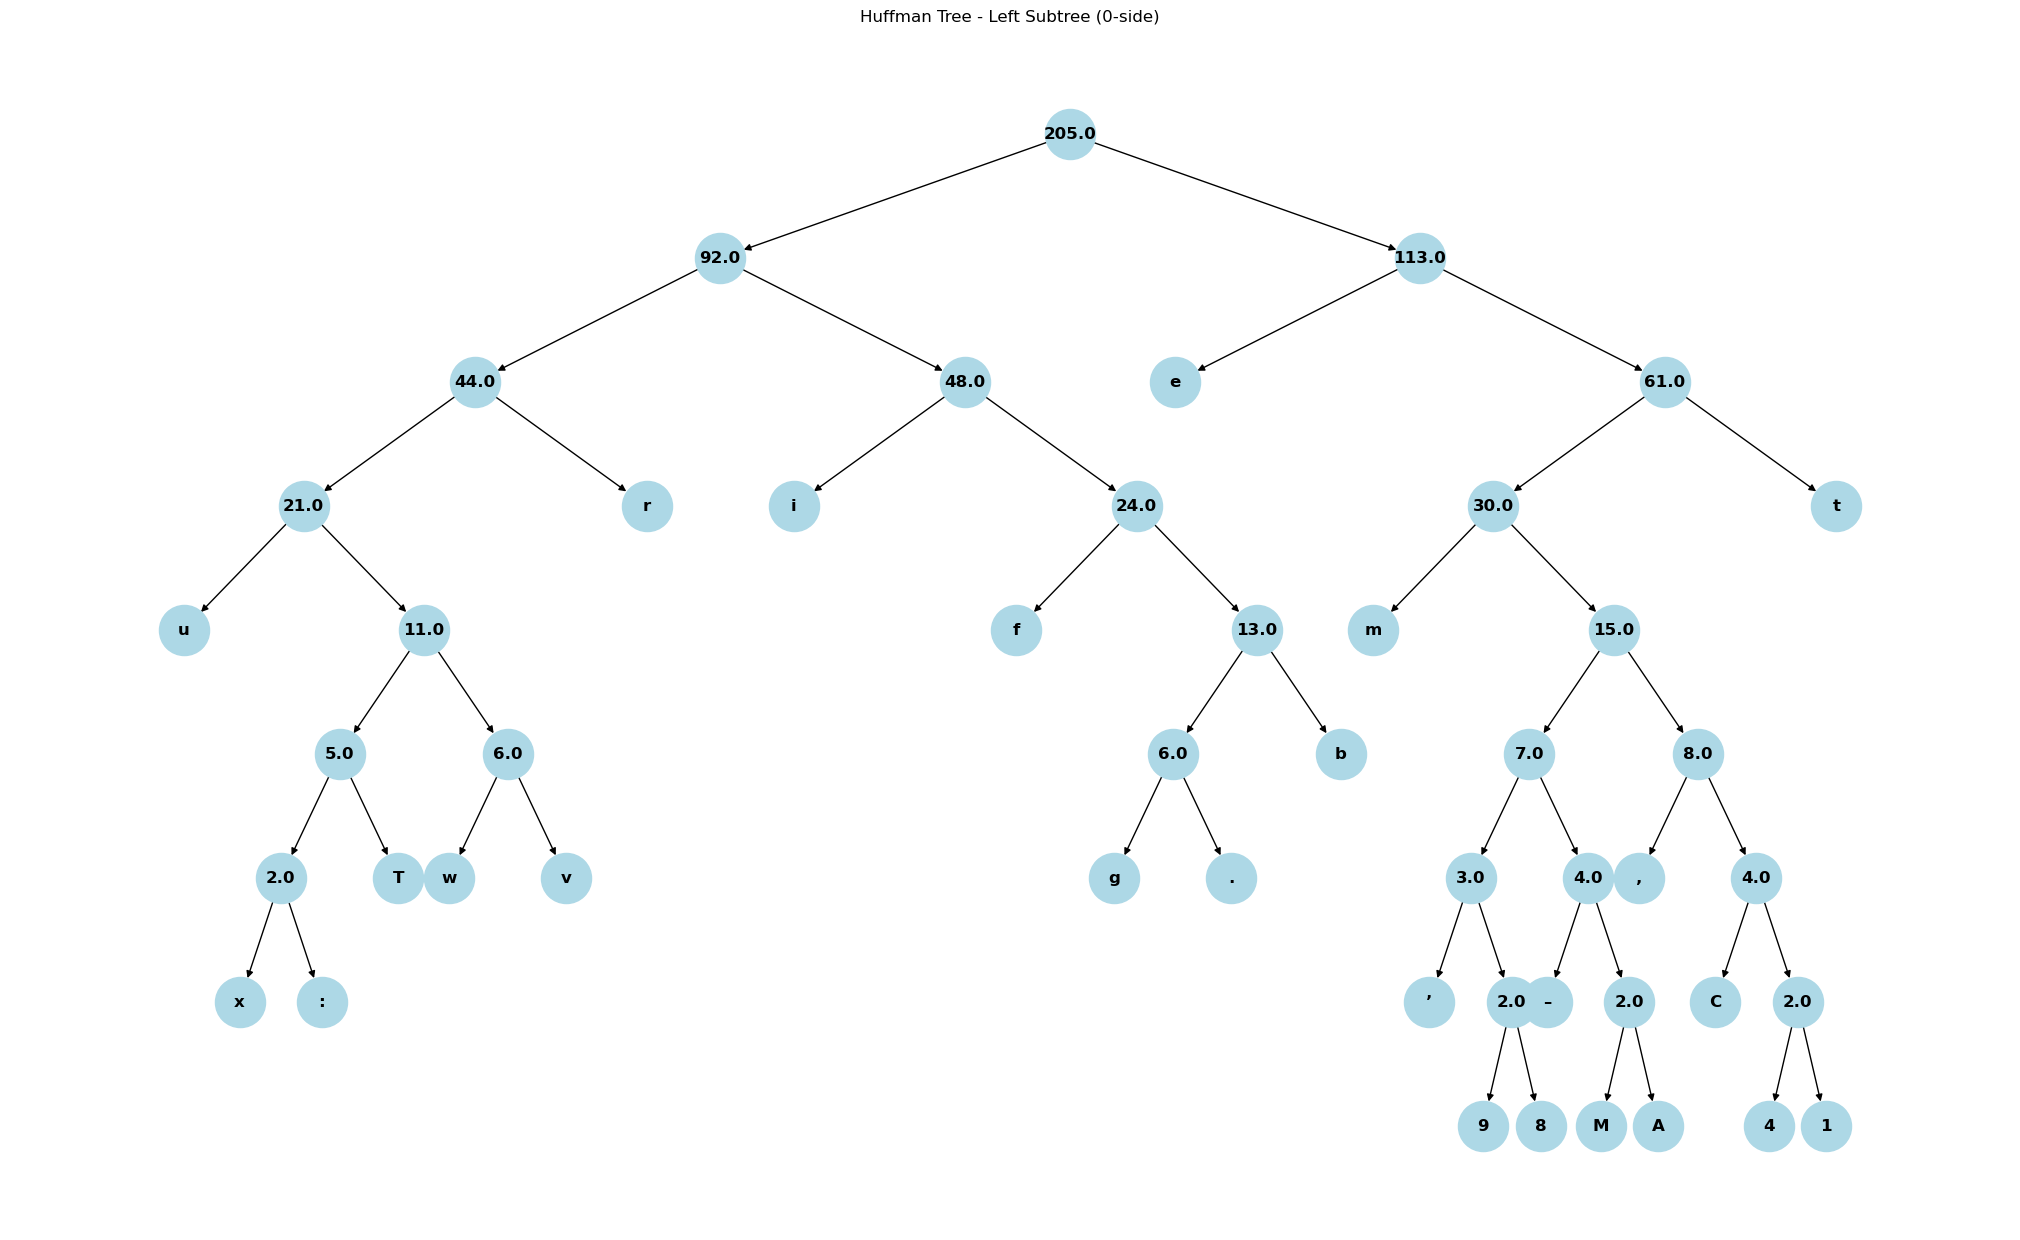

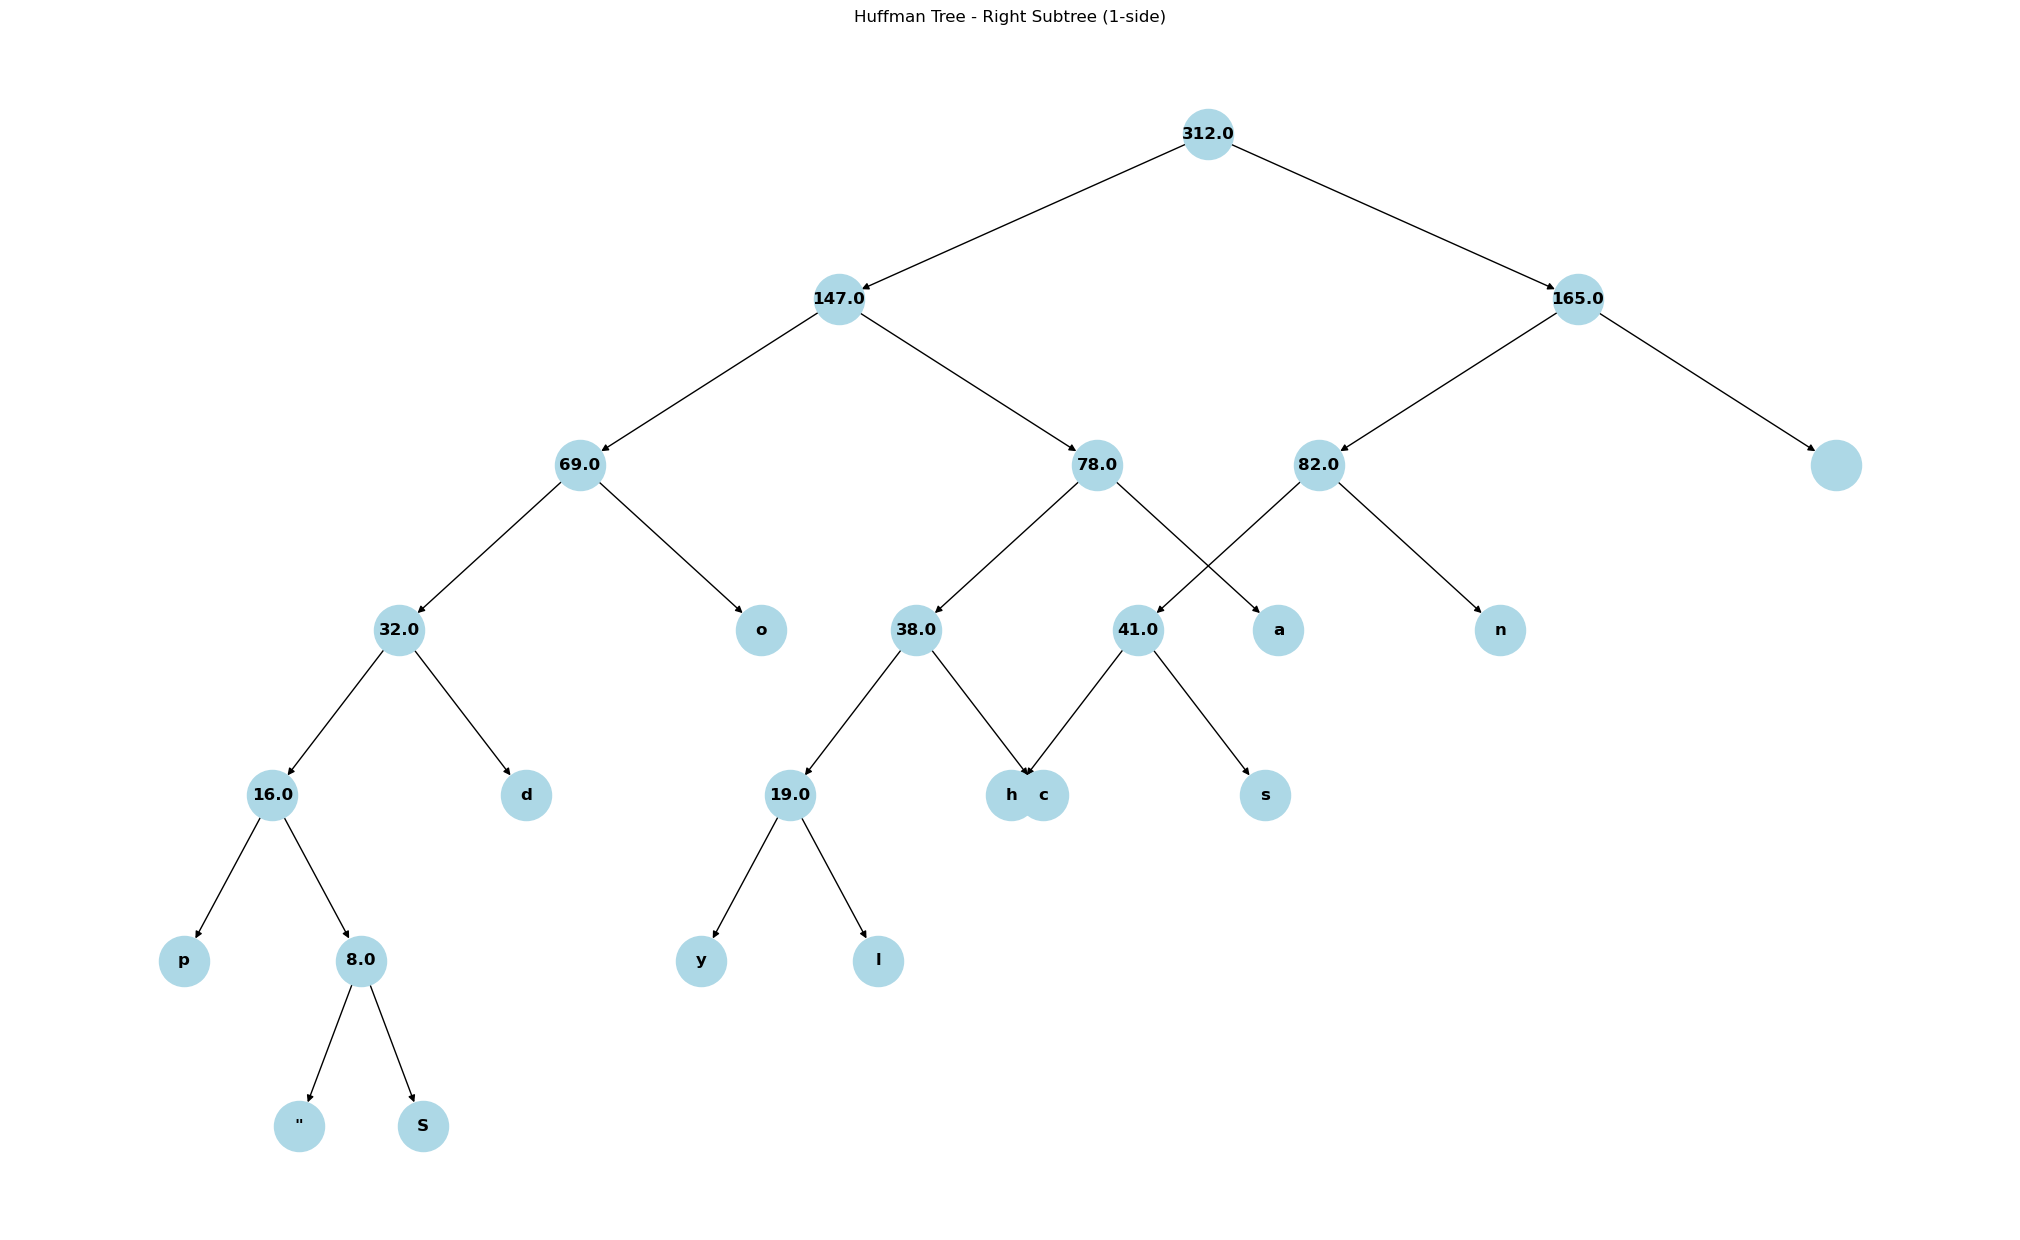

In [12]:
def visualize_subtree(node, title="Subtree"):
    import matplotlib.pyplot as plt
    import networkx as nx

    G = nx.DiGraph()
    pos = {}
    labels = {}

    def add_edges(n, parent=None, x=0, y=0, dx=4.0):  # Increased initial dx
        if n is None:
            return
        node_id = id(n)
        label = n.char if n.char else f"{n.freq:.1f}"
        labels[node_id] = label
        pos[node_id] = (x, y)
        if parent is not None:
            G.add_edge(id(parent), node_id)
        # Reduce dx more slowly to maintain wider spacing
        next_dx = dx * 0.7
        add_edges(n.left, n, x - next_dx, y - 1, next_dx)
        add_edges(n.right, n, x + next_dx, y - 1, next_dx)

    add_edges(node)

    plt.figure(figsize=(20, 12))  # Slightly larger canvas
    nx.draw(G, pos, labels=labels, with_labels=True,
            node_size=1300, node_color='lightblue',
            font_size=12, font_weight='bold', arrows=True)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Build the full Huffman tree
huffman_root = build_huffman_tree(freq_dict)

# Visualize left (0-side) and right (1-side) separately
visualize_subtree(huffman_root.left, title="Huffman Tree - Left Subtree (0-side)")
visualize_subtree(huffman_root.right, title="Huffman Tree - Right Subtree (1-side)")

## Huffman Code Generation using the Huffman Tree Code Explanation

Below code generates binary Huffman codes for each character based on the structure of the previously constructed Huffman tree. Huffman coding is a variable-length, prefix-free encoding scheme that assigns shorter codes to more frequent characters and longer codes to less frequent ones, optimizing compression efficiency.

In [15]:
# Generate Huffman codes from the tree
def generate_huffman_codes(root):
    codebook = {}

    def traverse(node, code=""):
        if node is None:
            return
        if node.left is None and node.right is None:
            codebook[node.char] = code
            return
        traverse(node.left, code + "0")
        traverse(node.right, code + "1")

    traverse(root)
    return codebook

huffman_codes = generate_huffman_codes(huffman_root)

# Sort characters by descending frequency
sorted_codes = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

# Print the Huffman codes alongside their frequencies
print("\n Huffman Codes (sorted by descending frequency):")
for char, freq in sorted_codes:
    code = huffman_codes.get(char, "")
    print(f"'{char}': {code}  (freq: {freq})")



 Huffman Codes (sorted by descending frequency):
' ': 111  (freq: 83)
'e': 010  (freq: 52)
'n': 1101  (freq: 41)
'a': 1011  (freq: 40)
'o': 1001  (freq: 37)
't': 0111  (freq: 31)
'i': 0010  (freq: 24)
'r': 0001  (freq: 23)
's': 11001  (freq: 21)
'h': 11000  (freq: 20)
'c': 10101  (freq: 19)
'd': 10001  (freq: 16)
'm': 01100  (freq: 15)
'f': 00110  (freq: 11)
'l': 101001  (freq: 10)
'u': 00000  (freq: 10)
'y': 101000  (freq: 9)
'p': 100000  (freq: 8)
'b': 001111  (freq: 7)
'S': 1000011  (freq: 4)
'"': 1000010  (freq: 4)
',': 0110110  (freq: 4)
'g': 0011100  (freq: 3)
'v': 0000111  (freq: 3)
'w': 0000110  (freq: 3)
'T': 0000101  (freq: 3)
'.': 0011101  (freq: 3)
'C': 01101110  (freq: 2)
'–': 01101010  (freq: 2)
'x': 00001000  (freq: 1)
'A': 011010111  (freq: 1)
'M': 011010110  (freq: 1)
'1': 011011111  (freq: 1)
'4': 011011110  (freq: 1)
'8': 011010011  (freq: 1)
'9': 011010010  (freq: 1)
'’': 01101000  (freq: 1)
':': 00001001  (freq: 1)


## Encoding the Text with Huffman Codes

Below code uses the above constructed Huffman codes to encode the English text into a binary string. The objective is to demonstrate the practical application of Huffman coding for lossless compression and to evaluate its efficiency relative to fixed-length encoding schemes such as ASCII. The encoding function iterates through each character in the input string and replaces it with its corresponding Huffman codes.

In [18]:
# Text to encode
text = """The concept of information entropy was introduced by Claude Shannon in his 1948 paper "A Mathematical Theory of Communication", and is also referred to as Shannon entropy. Shannon’s theory defines a data communication system composed of three elements: a source of data, a communication channel, and a receiver. The "fundamental problem of communication" – as expressed by Shannon – is for the receiver to be able to identify what data was generated by the source, based on the signal it receives through the channel."""
# Encode text using Huffman codes
def encode_text(text, huffman_codes):
    encoded_text = ''
    missing_chars = set()

    for char in text:
        if char in huffman_codes:
            encoded_text += huffman_codes[char]
        else:
            missing_chars.add(char)

    return encoded_text, missing_chars

# Call the function
encoded_text, missing_chars = encode_text(text, huffman_codes)

# Output the result
print("Original text:", text)
print("Encoded binary string:", encoded_text)

if missing_chars:
    print("\n Warning: These characters were not found in the Huffman code dictionary:")
    print(sorted(missing_chars))


Original text: The concept of information entropy was introduced by Claude Shannon in his 1948 paper "A Mathematical Theory of Communication", and is also referred to as Shannon entropy. Shannon’s theory defines a data communication system composed of three elements: a source of data, a communication channel, and a receiver. The "fundamental problem of communication" – as expressed by Shannon – is for the receiver to be able to identify what data was generated by the source, based on the signal it receives through the channel.
Encoded binary string: 000010111000010111101011001110110101010100000011111110010011011100101101001101001000101100101101110010100111011110101101011100011001100000101000111000011010111100111100101101011100011001100010000010101010100011110011111010001110110111010100110110000010001010111100001111000101111011101100111011110010110111111000001011001111011011111011010010011011110011010011111100000101110000001000011111000010011010111111011010110101101111100001001100101101

## Calculations

The following line of code computes the total number of bits used to represent the text after Huffman encoding:

In [21]:
# Calculating the total bits in encoded message
total_bits = len(encoded_text)
print("Total bits in encoded message:", total_bits)

Total bits in encoded message: 2252


The following line of code computes the average number of bits used per character in the Huffman-encoded text:

In [23]:
# Calculating the average bits per character
avg_bits_per_char = round(total_bits / len(text), 4)
print("Average bits per character:", avg_bits_per_char)

Average bits per character: 4.3559


The following code segment calculates the compression ratio achieved by Huffman encoding relative to standard ASCII encoding:

In [25]:
# Calculating the compression ratio vs ASCII (8 bits per character)
ascii_bits = len(text) * 8
compression_ratio = round(ascii_bits / total_bits, 4)
print("Compression ratio (ASCII / Huffman):", compression_ratio)

Compression ratio (ASCII / Huffman): 1.8366


# Task 4: Entropy in a Non-Latin Language

## Text Encoding Specification

Below code ensures accurate reading of a Sinhala text file by dynamically detecting its character encoding using the `chardet` library. This step is essential for preserving the integrity of grapheme clusters, diacritics, and joining mechanisms in non-Latin scripts such as Sinhala.

In [29]:
import chardet

# Detect encoding from raw bytes
with open(r"C:\Users\jayas\OneDrive\Documents\sinhala_text.txt", "rb") as raw_file:
    result = chardet.detect(raw_file.read())
    encoding = result['encoding']

# Print detected encoding
print("Detected Encoding:", encoding)

# Use the detected encoding to read the file
with open(r"C:\Users\jayas\OneDrive\Documents\sinhala_text.txt", "r", encoding=encoding) as file:
    data = file.read()

Detected Encoding: utf-8


Below code performs a structural analysis of a Sinhala Unicode text corpus by quantifying script-specific characters and invisible control symbols. It uses Python’s built-in `unicodedata` module and character-level iteration to extract meaningful statistics about the composition of the text. The goal is to assess the linguistic density, encoding integrity, and grapheme behavior of Sinhala script, which is essential for entropy modeling, compression analysis, and Unicode-aware preprocessing.

The function `analyze_sinhala_text()` iterates through each character in the input string and evaluates its Unicode code point using `ord()`. It checks whether the character falls within the Sinhala Unicode block (U+0D80 to U+0DFF), and if so, adds it to a set to ensure uniqueness and increments a counter. This block includes independent vowels, consonants, dependent vowel signs, diacritics, and Sinhala-specific punctuation.

In addition to Sinhala characters, the function detects two invisible control characters critical for grapheme formation:

- Zero Width Joiner (ZWJ): U+200D, used to form conjunct ligatures.
- Zero Width Non-Joiner (ZWNJ): U+200C, used to prevent ligature formation.

Each occurrence of ZWJ and ZWNJ is counted separately, providing insight into the complexity of grapheme clusters and the presence of non-visible formatting behavior. The total number of Unicode code points in the text is also computed to contextualize the proportion of Sinhala characters and control symbols relative to the full corpus.

In [31]:
import unicodedata

def analyze_sinhala_text(text):
    sinhala_chars = set()
    sinhala_count = 0
    zwj_count = 0
    zwnj_count = 0

    for char in text:
        codepoint = ord(char)
        if '\u0D80' <= char <= '\u0DFF':
            sinhala_chars.add(char)
            sinhala_count += 1
        elif codepoint == 0x200D:  # Zero Width Joiner
            zwj_count += 1
        elif codepoint == 0x200C:  # Zero Width Non-Joiner
            zwnj_count += 1

    total_codepoints = len(text)

    return {
        "unique_sinhala_chars": sorted(sinhala_chars),
        "sinhala_count": sinhala_count,
        "zwj_count": zwj_count,
        "zwnj_count": zwnj_count,
        "total_codepoints": total_codepoints
    }

# Sinhala dataset
text = "ශ්‍රී ලංකාවේ විශාලත්වය වර්ග කි.මී 65,610 (වර්ග සැතපුම් 25,330) වේ. එය ලොව 123 වැනි විශාලතම රට වන අතර විශාලතම දූපත් අතරින් 25 වන ස්ථානයෙ සිටියි. එහි භූමි ප්‍රදේශය පළාත් නවයකට සහ දිස්ත්‍රික්ක විසිහතරකට වෙන් කර ඇත. රට පළාත් 9 කින්, දිස්ත්‍රික්ක 25 හා ප්‍රදේශිය ලේකම් කොට්ටාශය 331 හා ග්‍රාම නිලධාරි කොට්ටාශ 14,022 කින් සමන්විත වේ. අගනුවර ශ්‍රී ජයවර්ධනපුර කොට්ටේ වන අතර විශාලතම නගරය කොළඹ වේ. කොළඹ ජාතියේ ආර්ථික, දේශපාලන කේන්ද්‍රස්ථානයයි. ශ්‍රී ලංකාව ලෝක උරුම ස්ථාන අටක්, සැතපුම් ගණනක් පුරා විහිදුනු රන්වන් වැලි සහිත වෙරළවල්, වැසි වනාන්තර සහ කඳුකර තේ වතු සහිත ඉතා සුන්දර දූපතකි. නිවර්තන වනාන්තර, වෙරළ සහ භූ දර්ශනවල ස්වභාවික සුන්දරත්වය, ජෛව විවිධත්වය මෙන්ම පොහොසත් සංස්කෘතික උරුමයන් සඳහා ප්‍රසිද්ධය, එය ලෝක ප්‍රසිද්ධ සංචාරක ගමනාන්තයක් බවට පත් කළේය."

# Run analysis
result = analyze_sinhala_text(text)

# Display
print("Unique Sinhala Characters:")
print(" ".join(result["unique_sinhala_chars"]))
print(f"\nTotal Sinhala Characters: {result['sinhala_count']}")
print(f"ZWJ Count: {result['zwj_count']}")
print(f"ZWNJ Count: {result['zwnj_count']}")
print(f"Total Unicode Code Points: {result['total_codepoints']}")


Unique Sinhala Characters:
ං අ ආ ඇ ඉ උ එ ක ග ච ජ ට ණ ත ථ ද ධ න ඳ ප බ භ ම ඹ ය ර ල ව ශ ස හ ළ ් ා ැ ි ී ු ූ ෘ ෙ ේ ෛ ො ෝ

Total Sinhala Characters: 566
ZWJ Count: 11
ZWNJ Count: 0
Total Unicode Code Points: 741
